In [1]:
import asimov_database as ad
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


In [2]:
import seaborn as sns

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('float_format', '{:f}'.format)

In [5]:
reader = ad.ParquetReader()

In [6]:
data_from_postgres = reader.get_marketdata_from_postgres("incremental", "DOLF20", "2019-12-05", db="md_rt")

In [8]:
md = reader.get_account_data_from_parquet('2019-12-05')

In [9]:
md = md.read().to_pandas()

In [10]:
md = md[["ts", "sender_comp_id", "target_comp_id", "symbol", "state", "secondary_order_id", "client_order_id", "order_qty", "side", "price", "time_in_force", "request_ts", "response_ts"]]

In [11]:
md

,ts,sender_comp_id,target_comp_id,symbol,state,secondary_order_id,client_order_id,order_qty,side,price,time_in_force,request_ts,response_ts
0,1575568723341202380,XBTG0317,OE168,TF3Z99,WAITING_ACCEPT,None,223849,1,BUY,100.000000,DAY,1575568723341202380,0
1,1575568723343035103,XBTG0317,OE168,TF3Z99,REJECTED,None,223849,1,BUY,100.000000,DAY,1575568723341202380,1575568723343035103
2,1575569008026939598,XBTG0322,OE196,WDOF20,WAITING_ACCEPT,None,WA0000000000000000000000ABd6RvAAAAAAAC,1,BUY,4171.000000,IMMEDIATE_OR_CANCEL,1575569008026939598,0
3,1575569008028410721,XBTG0322,OE196,WDOF20,ACCEPTED,744113538363,WA0000000000000000000000ABd6RvAAAAAAAC,1,BUY,4171.000000,IMMEDIATE_OR_CANCEL,1575569008026939598,1575569008028410721
4,1575569008028577786,XBTG0322,OE196,WDOF20,CANCELED,744113538363,WA0000000000000000000000ABd6RvAAAAAAAC,1,BUY,4171.000000,IMMEDIATE_OR_CANCEL,1575569008026939598,1575569008028410721
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81972,1575578244747103089,XBTG0337,OE209,WDOF20,ACCEPTED,744120146066,UP0000000000000000000000ABd6T/AAAACAAB,1,SELL,4194.500000,IMMEDIATE_OR_CANCEL,1575578244745820523,1575578244747103089
81973,1575578244747275275,XBTG0337,OE209,WDOF20,FILLED,744120146066,UP0000000000000000000000ABd6T/AAAACAAB,1,SELL,4194.500000,IMMEDIATE_OR_CANCEL,1575578244745820523,1575578244747103089
81974,1575578327133295006,XBTG0317,OE168,WDOF20,WAITING_ACCEPT,None,533506,1,BUY,4200.000000,DAY,1575578327133295006,0
81975,1575578327134940741,XBTG0317,OE168,WDOF20,ACCEPTED,744120206985,533506,1,BUY,4200.000000,DAY,1575578327133295006,1575578327134940741


In [12]:
trades = reader.get_parquet(symbol='WDOF20',
                            date='2019-12-05',
                            type_='trades')
md_trades = trades.read().to_pandas()

In [13]:
md_trades = md_trades.reset_index()

In [85]:
md_incremental = reader.get_parquet(symbol='WDOF20',date='2019-12-06',type_='events')

In [86]:
mini_dol = md_incremental['incremental'].read().to_pandas()

In [87]:
mini_dol= mini_dol.dropna()

In [88]:
mini_dol = mini_dol.reset_index()

In [89]:
mini_dol['type'] = 'mini_inc'

In [90]:
mini_dol.head()

,ts,id,msg_seq_num,symbol,event_type,side,position,order_id,broker,order_ts,price,quantity,status,i,type
0,2019-12-06 11:55:01.234000+00:00,67327084,12896079,WDOF20,INSERT,B,1.000000,744121280689.000000,88.000000,11:55:01.234000,4150.000000,5.000000,None,5,mini_inc
1,2019-12-06 11:55:01.608000+00:00,67327085,12896080,WDOF20,INSERT,B,1.000000,744121280690.000000,88.000000,11:55:01.608000,4177.000000,2.000000,None,6,mini_inc
2,2019-12-06 11:55:02.454000+00:00,67327087,12896082,WDOF20,INSERT,B,3.000000,744121280692.000000,88.000000,11:55:02.453000,4133.000000,2.000000,None,7,mini_inc
3,2019-12-06 11:55:03.858000+00:00,67327088,12896083,WDOF20,INSERT,A,1.000000,744121280693.000000,386.000000,11:55:03.857000,4220.000000,1.000000,None,8,mini_inc
4,2019-12-06 11:55:05.795000+00:00,67327090,12896085,WDOF20,INSERT,B,1.000000,744121280694.000000,3.000000,11:55:05.795000,4178.000000,40.000000,None,9,mini_inc


In [91]:
mini_dol_snap = md_incremental['snapshot'].read().to_pandas()


In [92]:
mini_dol_snap = mini_dol_snap.reset_index()

In [93]:
mini_dol_snap['type'] = 'mini_snap'


In [94]:
mini_dol_snap.head()


,index,ts,msg_seq_num,symbol,side,position,order_id,broker,order_ts,price,quantity,type


In [95]:
mini_dol_snap.sort_values(by='order_ts', kind = 'mergesort').head()#['order_id']#.unique()#['order_id'].plot(style='-', figsize=(15,6))

,index,ts,msg_seq_num,symbol,side,position,order_id,broker,order_ts,price,quantity,type


In [96]:
md_dol = reader.get_parquet(symbol='DOLF20',date='2019-12-06',type_='events')


In [97]:
dol = md_dol['incremental'].read().to_pandas()

In [98]:
dol = dol.dropna()

In [99]:
dol = dol.reset_index()

In [100]:
dol['type'] = 'dol'

In [101]:
dol.head()

,ts,id,msg_seq_num,symbol,event_type,side,position,order_id,broker,order_ts,price,quantity,status,i,type
0,2019-12-06 11:55:00.153000+00:00,67327077,12896072,DOLF20,INSERT,A,1.000000,744121280681.000000,3.000000,11:55:00.153000,4200.000000,5.000000,None,4,dol
1,2019-12-06 11:55:00.226000+00:00,67327078,12896073,DOLF20,INSERT,A,2.000000,744121280682.000000,3.000000,11:55:00.225000,4203.000000,5.000000,None,5,dol
2,2019-12-06 11:55:00.245000+00:00,67327079,12896074,DOLF20,INSERT,A,3.000000,744121280683.000000,3.000000,11:55:00.244000,4205.000000,5.000000,None,6,dol
3,2019-12-06 11:55:00.272000+00:00,67327080,12896075,DOLF20,INSERT,A,1.000000,744121280684.000000,3.000000,11:55:00.272000,4175.000000,5.000000,None,7,dol
4,2019-12-06 11:55:00.282000+00:00,67327081,12896076,DOLF20,INSERT,B,1.000000,744121280685.000000,3.000000,11:55:00.282000,4170.000000,10.000000,None,8,dol


In [102]:
dol.merge(mini_dol, on ='order_id', how = 'inner')

,ts_x,id_x,msg_seq_num_x,symbol_x,event_type_x,side_x,position_x,order_id,broker_x,order_ts_x,price_x,quantity_x,status_x,i_x,type_x,ts_y,id_y,msg_seq_num_y,symbol_y,event_type_y,side_y,position_y,broker_y,order_ts_y,price_y,quantity_y,status_y,i_y,type_y


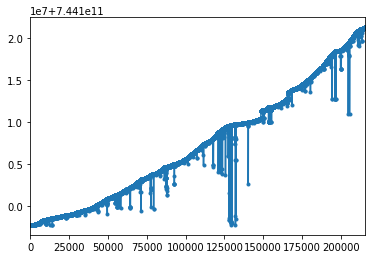

In [34]:
dol['order_id'].plot(style='.-')

In [103]:
all_ = pd.concat([dol, mini_dol])

In [104]:
sorted_ = all_.sort_values(by='msg_seq_num', kind = 'mergesort').reset_index()

In [105]:
sorted_ = sorted_.drop(['index'], axis =1)

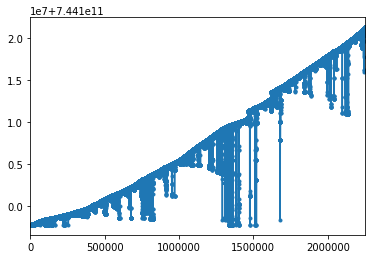

In [283]:
sorted_['order_id'].plot(style='.-')

In [66]:
sorted_.event_type.unique()

array(['INSERT', 'CHANGE'], dtype=object)

In [39]:
sorted_.event_type.value_counts() 

CHANGE    1160860
INSERT    1089495
Name: event_type, dtype: int64

In [106]:
sorted2_ = sorted_ [sorted_['event_type'] != 'CHANGE'].reset_index()


In [107]:
sorted2_['gap'] = sorted2_['order_id'] - sorted2_['order_id'].shift(1)

In [143]:
sorted2_.head()

,index,ts,id,msg_seq_num,symbol,event_type,side,position,order_id,broker,order_ts,price,quantity,status,i,type,gap
0,0,2019-12-06 11:55:00.153000+00:00,67327077,12896072,DOLF20,INSERT,A,1.000000,744121280681.000000,3.000000,11:55:00.153000,4200.000000,5.000000,None,4,dol,nan
1,1,2019-12-06 11:55:00.226000+00:00,67327078,12896073,DOLF20,INSERT,A,2.000000,744121280682.000000,3.000000,11:55:00.225000,4203.000000,5.000000,None,5,dol,1.000000
2,2,2019-12-06 11:55:00.245000+00:00,67327079,12896074,DOLF20,INSERT,A,3.000000,744121280683.000000,3.000000,11:55:00.244000,4205.000000,5.000000,None,6,dol,1.000000
3,3,2019-12-06 11:55:00.272000+00:00,67327080,12896075,DOLF20,INSERT,A,1.000000,744121280684.000000,3.000000,11:55:00.272000,4175.000000,5.000000,None,7,dol,1.000000
4,4,2019-12-06 11:55:00.282000+00:00,67327081,12896076,DOLF20,INSERT,B,1.000000,744121280685.000000,3.000000,11:55:00.282000,4170.000000,10.000000,None,8,dol,1.000000


In [43]:
df = sorted2_[sorted2_['gap'] < 0].reset_index()

In [44]:
sorted2_[sorted2_['gap'] < 0].shape

(24, 17)

In [57]:
A=[]
for i in range(0, 1100000, 10000):
    A.append(i)

In [58]:
B= []
for i in range(len(A)):
    a= sorted2_ [sorted2_.gap ==1].loc[A[i]:A[1+i]].shape[0]
    b = (sorted2_.ts[A[1+i]] - sorted2_.ts[A[i]]).seconds + ((sorted2_.ts[A[1+i]] - sorted2_.ts[A[i]]).microseconds)/ (10**6)
    c= sorted2_.order_id[A[1+i]] - sorted2_.order_id[A[i]]
    B.append((c-a)/b)


KeyError: 1090000

# Estimativa de players para intervalor de 1k


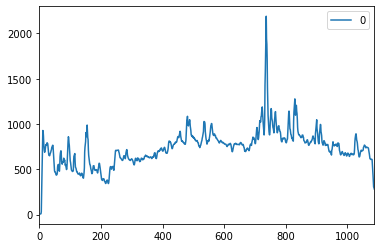

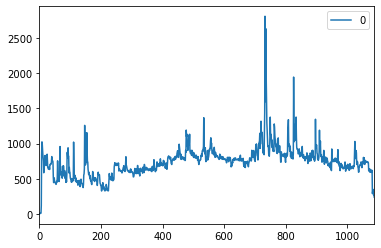

In [300]:
pd.DataFrame(B).rolling(window=5).mean().plot()
pd.DataFrame(B).plot()

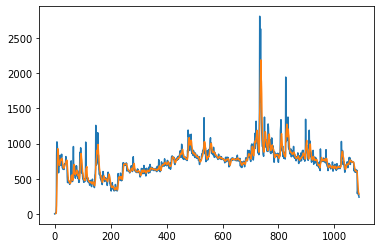

In [296]:
plt.plot(B)
plt.plot(B_m)

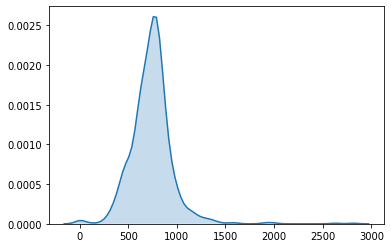

In [47]:
sns.kdeplot(B, shade=True)

In [50]:
print(pd.DataFrame(B).mean(), pd.DataFrame(B).median(), pd.DataFrame(B).std())

0   739.616603
dtype: float64 0   746.805112
dtype: float64 0   215.927841
dtype: float64


# Estimativa de players para intervalor de 5k


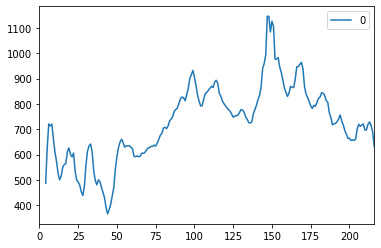

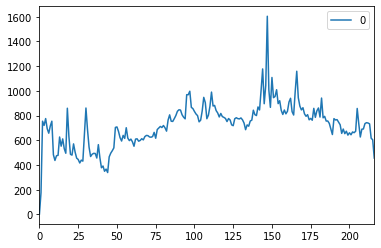

In [53]:
pd.DataFrame(B).rolling(window=5).mean().plot()
pd.DataFrame(B).plot()

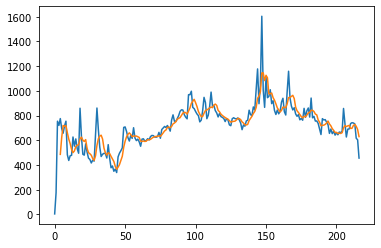

In [54]:
plt.plot(B)
plt.plot(pd.DataFrame(B).rolling(window=5).mean())

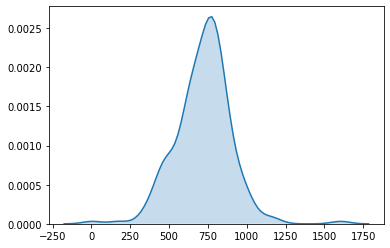

In [55]:
sns.kdeplot(B, shade=True)

In [56]:
print(pd.DataFrame(B).mean(), pd.DataFrame(B).median(), pd.DataFrame(B).std())

0   721.200948
dtype: float64 0   742.883883
dtype: float64 0   176.166466
dtype: float64


# Estimativa de players para intervalor de 10k


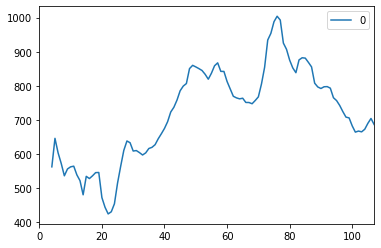

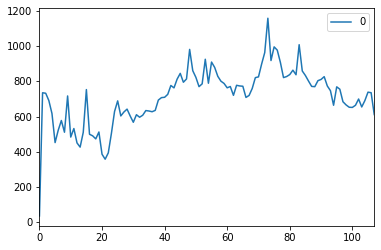

In [59]:
pd.DataFrame(B).rolling(window=5).mean().plot()
pd.DataFrame(B).plot()

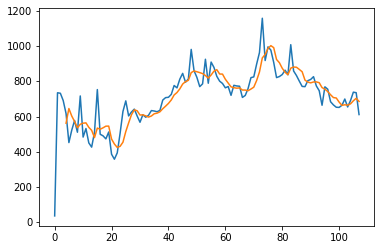

In [62]:
plt.plot(B)
plt.plot(pd.DataFrame(B).rolling(window=5).mean())


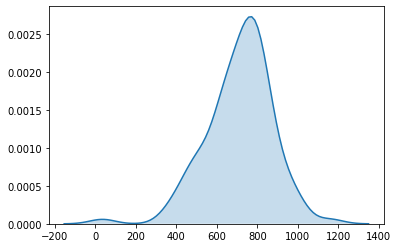

In [63]:
sns.kdeplot(B, shade=True)

In [64]:
print(pd.DataFrame(B).mean(), pd.DataFrame(B).median(), pd.DataFrame(B).std())

0   712.775332
dtype: float64 0   735.970297
dtype: float64 0   161.357527
dtype: float64


# OUTRA ANALISE

In [68]:
sorted2_.event_type.unique()

array(['INSERT'], dtype=object)

In [109]:
dl = sorted2_[sorted2_['gap'] < 0].reset_index()

In [110]:
dl.head()

,level_0,index,ts,id,msg_seq_num,symbol,event_type,side,position,order_id,broker,order_ts,price,quantity,status,i,type,gap
0,2801,2847,2019-12-06 12:00:49.179000+00:00,67330784,12899448,WDOF20,INSERT,B,1.000000,744121284091.000000,120.000000,12:00:49.178000,4185.000000,8.000000,None,2690,mini_inc,-5.000000
1,24521,35361,2019-12-06 12:05:11.022000+00:00,67377619,12941217,DOLF20,INSERT,B,1.000000,744121332671.000000,120.000000,12:05:11.022000,4192.500000,40.000000,None,8198,dol,-78819.000000
2,30153,43817,2019-12-06 12:06:17.504000+00:00,67389807,12952310,DOLF20,INSERT,B,1.000000,744121311466.000000,120.000000,12:06:17.504000,4193.000000,160.000000,None,9299,dol,-144394.000000
3,110503,190191,2019-12-06 12:34:32.853000+00:00,67602649,13148306,WDOF20,INSERT,A,1.000000,744122444699.000000,120.000000,12:34:32.851000,4187.500000,1.000000,None,240435,mini_inc,-5817.000000
4,110505,190194,2019-12-06 12:34:32.853000+00:00,67602654,13148308,WDOF20,INSERT,A,2.000000,744122319989.000000,120.000000,12:34:32.852000,4187.000000,1.000000,None,240440,mini_inc,-127499.000000


In [111]:
dh = dl [['msg_seq_num', 'symbol', 'order_id', 'ts'] ]

In [113]:
con = pd.concat([dh,df])

In [116]:
con.to_csv('negative_order_id', sep = ',', header = True, index = False)

In [144]:
sorted2_.to_csv('dataframe.csv', sep = ',', header = True, index = False)

In [76]:
to_csv('allsymbols.csv', sep = ',', header = True, index = False)

In [81]:
df.head()

,msg_seq_num,symbol,order_id,ts
0,9800110,DOLF20,744098397282.000000,2019-12-05 12:21:38.613000+00:00
1,9937050,WDOF20,744098755954.000000,2019-12-05 12:32:36.202000+00:00
2,10140010,DOLF20,744099472308.000000,2019-12-05 12:58:05.929000+00:00
3,10160864,WDOF20,744099540237.000000,2019-12-05 13:00:15.645000+00:00
4,10212245,DOLF20,744099803821.000000,2019-12-05 13:06:53.518000+00:00


In [ ]:
dl = sorted2_[sorted2_['gap'] > 0].reset_index()

In [132]:
sorted3_ = sorted_ #[sorted_['event_type'] != 'CHANGE'].reset_index()


In [139]:
sorted3_.head()

,index,ts,id,msg_seq_num,symbol,event_type,side,position,order_id,broker,order_ts,price,quantity,status,i,type,gap
0,410,2019-12-06 11:56:03.082000+00:00,67327510,12896499,WDOF20,CHANGE,A,213.000000,744121281116.000000,1982.000000,11:56:03.081000,4353.000000,1.000000,None,424,mini_inc,1.000000
1,747,2019-12-06 11:57:31.282000+00:00,67327938,12896900,WDOF20,CHANGE,A,23.000000,744121281519.000000,3.000000,11:57:31.281000,4189.000000,20.000000,None,769,mini_inc,1.000000
2,1151,2019-12-06 11:59:05.499000+00:00,67328443,12897375,WDOF20,CHANGE,B,370.000000,744121282008.000000,308.000000,11:59:05.498000,4157.000000,2.000000,None,1232,mini_inc,1.000000
3,1216,2019-12-06 11:59:22.790000+00:00,67328536,12897457,WDOF20,CHANGE,B,56.000000,744121282094.000000,88.000000,11:59:22.790000,4189.000000,1.000000,None,1315,mini_inc,1.000000
4,1559,2019-12-06 12:00:12.968000+00:00,67329109,12897873,WDOF20,CHANGE,A,91.000000,744121282485.000000,3.000000,12:00:12.968000,4190.000000,1.000000,None,1672,mini_inc,1.000000


In [133]:
sorted3_['gap'] = sorted3_['order_id'] - sorted3_['order_id'].shift(1)

In [134]:
sorted3_ = sorted3_ [sorted3_['event_type'] == 'CHANGE'].reset_index()


In [135]:
sorted3_ = sorted3_ [sorted3_['gap'] >= 1]

In [142]:
sorted_.loc[2834:2837]

,ts,id,msg_seq_num,symbol,event_type,side,position,order_id,broker,order_ts,price,quantity,status,i,type,gap
2834,2019-12-06 12:00:49.102000+00:00,67330766,12899431,WDOF20,INSERT,A,2.000000,744121284067.000000,308.000000,12:00:49.102000,4185.500000,5.000000,None,2674,mini_inc,1.000000
2835,2019-12-06 12:00:49.105000+00:00,67330767,12899432,WDOF20,CHANGE,A,16.000000,744121284068.000000,386.000000,12:00:49.105000,4186.000000,18.000000,None,2675,mini_inc,1.000000
2836,2019-12-06 12:00:49.108000+00:00,67330768,12899433,WDOF20,CHANGE,A,395.000000,744121284069.000000,308.000000,12:00:49.107000,4200.000000,2.000000,None,2676,mini_inc,1.000000
2837,2019-12-06 12:00:49.110000+00:00,67330769,12899434,WDOF20,CHANGE,B,20.000000,744121284070.000000,308.000000,12:00:49.110000,4184.000000,15.000000,None,2677,mini_inc,1.000000


In [ ]:
dl['dt'] =( dl['ts'] - dl['ts'].shift(1))


In [ ]:
dl.head()

In [ ]:
dl['sec'] = dl['dt'].apply(lambda x: x.seconds)
dl['micro'] = dl['dt'].apply(lambda x: x.microseconds)
dl['time'] = dl['sec']+(dl['micro'] /10 ** 6)


In [ ]:
dl  = dl [ dl['time'] != 0]

# dl['DATA_COMPRA'] = dl['DATA_COMPRA'].apply(lambda x : pd.to_datetime(x))

In [ ]:
A = [0]
#while len(dl.index) > 100:
for i in range(150): #(len(dl.index)):# dl.iterrows(): 
    val = np.flatnonzero(np.isclose(dH.time.cumsum().values, 100, atol =.40))[0]
    dH = dl.loc[val+sum(A)::]
    A.append(val)

In [ ]:
dl['cumsum'] = dl.time.cumsum()

In [ ]:
dl = dl.dropna()

In [ ]:
dl = dl.drop(['index'], axis = 1)

In [ ]:
dl= dl.reset_index()